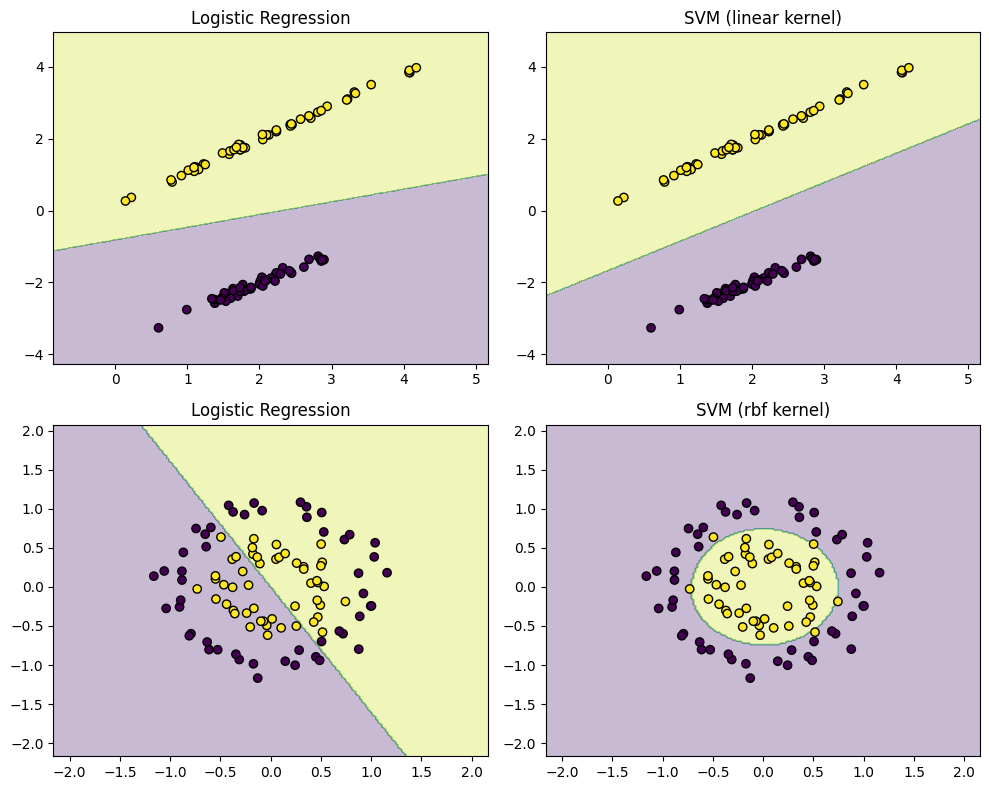

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Generate linear data
X_lin, y_lin = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Generate non-linear data
X_nonlin, y_nonlin = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

def plot_decision_boundary(clf, X, y, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

# Fit models
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for data, ax_row, kernel in zip([(X_lin, y_lin), (X_nonlin, y_nonlin)], axes, ['linear', 'rbf']):
    X, y = data
    log_reg = LogisticRegression().fit(X, y)
    svm = SVC(kernel=kernel).fit(X, y)
    plot_decision_boundary(log_reg, X, y, ax_row[0], 'Logistic Regression')
    plot_decision_boundary(svm, X, y, ax_row[1], f'SVM ({kernel} kernel)')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=.1, noise=.1, random_state=42)

# Fit the SVM model with an RBF kernel
clf = svm.SVC(kernel='rbf', C=10, gamma='auto', verbose=False)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Non-Linearly Separable Data with RBF Kernel SVM')
plt.show()

AttributeError: 'SVC' object has no attribute 'SVC'